## Gaussian Processes (GP) with GPy


In this notebook we are going to use GPy library for GP modeling [SheffieldML github page](https://github.com/SheffieldML/GPy).

Why **GPy**?

* Specialized library of GP models (regression, classification, GPLVM)
* Variety of covariance functions is implemented
* There are GP models for large-scale problems
* Easy to use

Run the following line to install GPy library

In [ ]:
!pip install GPy

In [1]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import GPy

Current documentation of GPy library can be found [here](http://gpy.readthedocs.org/en/latest/).

## Gaussian Process Regression

A data set $\left (X, \mathbf{y} \right ) = \left \{ (x_i, y_i), x_i \in \mathbb{R}^d, y_i \in \mathbb{R} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
y = f(x) + \varepsilon,
$$
where $f(x)$ is a Gaussian Processes and $\varepsilon \sim \mathcal{N}(0, \sigma_n^2)$ is a Gaussian noise .

Posterior distribution
$$
y_* | X, \mathbf{y}, x_* \sim \mathcal{N}(m(x_*), \sigma(x_*)),
$$
with predictive mean and variance given by
$$
m(x_*) = \mathbf{k}^T \mathbf{K}_y^{-1} \mathbf{y} = \sum_{i = 1}^N \alpha_i k(x_*, x_i),
$$
$$
\sigma^2(x_*) = k(x_*, x_*) - \mathbf{k}^T\mathbf{K}_y^{-1}\mathbf{k},
$$
where
$$
\mathbf{k} = \left ( k(x_*, x_1), \ldots, k(x_*, x_N) \right )^T
$$
$$
\mathbf{K}_y = \|k(x_i, x_j)\|_{i, j = 1}^N + \sigma_n^2 \mathbf{I}
$$

## Building GPR model

Lets fit GPR model for function $f(x) = − \cos(\pi x) + \sin(4\pi x)$ in $[0, 1]$,
with noise $y(x) = f(x) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.1)$. 

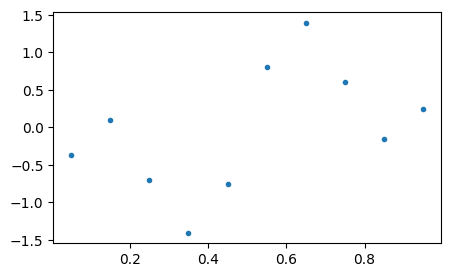

In [4]:
N = 10
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.1, size=(N, 1))
plt.figure(figsize=(5, 3))
plt.plot(X, Y, '.')

#### 1. Define covariance function

The most popular kernel - RBF kernel - has 2 parameters: `variance` and `lengthscale`, $k(x, y) = \sigma^2 \exp\left ( -\dfrac{\|x - y\|^2}{2l^2}\right )$,
where `variance` is $\sigma^2$, and `lengthscale` - $l$.

In [6]:
input_dim = 1
variance = 1
lengthscale = 0.2
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,0.2,+ve,


#### 2. Create GPR model


Name : GP regression
Objective : 13.364582222015907
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    0.2  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5ac89a4190>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5ac88bd590>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5ac88e47d0>]}

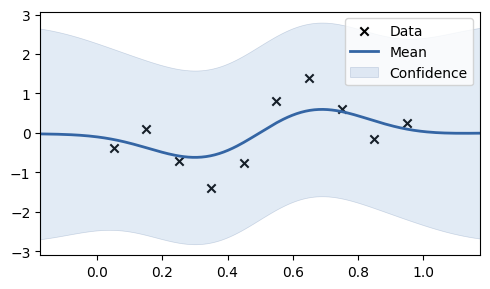

In [7]:
model = GPy.models.GPRegression(X, Y, kernel)
print(model)
model.plot(figsize=(5, 3))

### Parameters of the covariance function

Values of parameters of covariance function can be set like:  `k.lengthscale = 0.1`.

Let's change the value of `lengthscale` parameter and see how it changes the covariance function.

In [ ]:
k = GPy.kern.RBF(1)
theta = np.asarray([0.2, 0.5, 1, 2, 4, 10])
figure, axes = plt.subplots(2, 3, figsize=(8, 4))
for t, ax in zip(theta, axes.ravel()):
    k.lengthscale = t
    k.plot(ax=ax)
    ax.set_ylim([0, 1])
    ax.set_xlim([-4, 4])
    ax.legend([t])

### Task
Try to change parameters to obtain more accurate model.

In [8]:
######## Your code here ########
input_dim = 1
variance = 3
lengthscale = 0.3
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)
model = GPy.models.GPRegression(X, Y, kernel)


Name : GP regression
Objective : 55.63982384222799
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    3.0  |      +ve      |        
  rbf.lengthscale          |    0.3  |      +ve      |        
  Gaussian_noise.variance  |   0.01  |   +ve fixed   |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5ac8a44050>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5ac8931ad0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5ac896dc50>]}

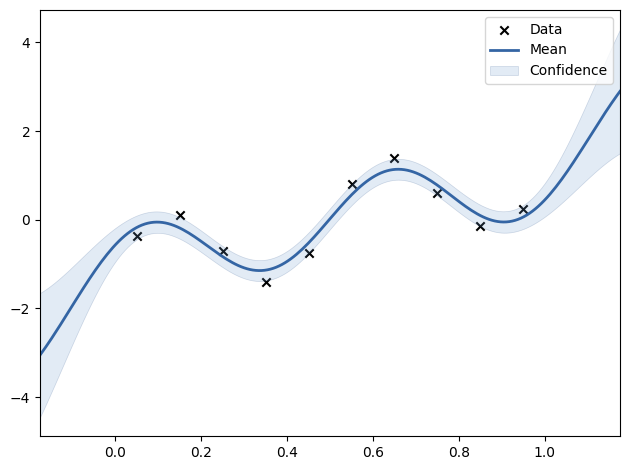

In [9]:
model.Gaussian_noise.variance.fix(0.01)
print(model)
model.plot()

### Tuning parameters of the covariance function

The parameters are tuned by maximizing likelihood. To do it just use `optimize()` method of the model.

In [ ]:
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
print(model)
model.plot(figsize=(5, 3))

### Noise variance

Noise variance acts like a regularization in GP models. Larger values of noise variance lead to more smooth model.  
Let's check it: try to change noise variance to some large value, to some small value and see the results.

Noise variance accessed like this: `model.Gaussian_noise.variance = 1`

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5ac6744190>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5ac6740810>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5ac643ca10>]}

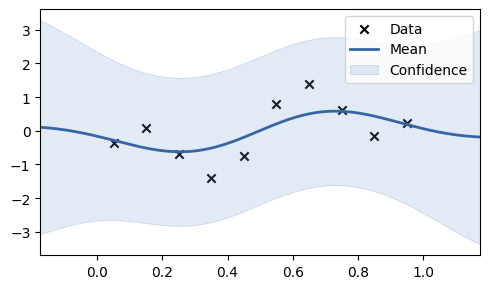

In [13]:
######## Your code here ########
model.Gaussian_noise.variance = 1
model.plot(figsize=(5, 3))

Now, let's generate more noisy data and try to fit model.


Name : GP regression
Objective : 33.024357493432944
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.6987902121284942  |      +ve      |        
  rbf.lengthscale          |  0.14140585364096966  |      +ve      |        
  Gaussian_noise.variance  |   0.1917473040064887  |      +ve      |        


((40, 1), (40, 1))

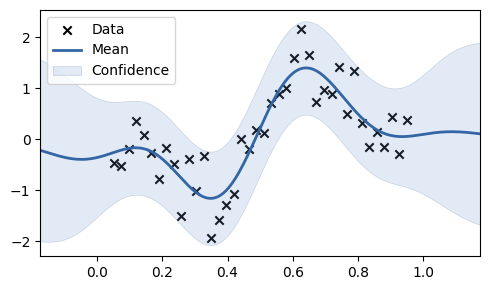

In [41]:
N = 40
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.5, size=(N, 1))

kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
print(model)
model.plot(figsize=(5, 3))
X.shape, Y.shape

Now, let's fix noise variance to some small value and fit the model

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5ac632a450>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5ac6341b10>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5ac6342650>]}

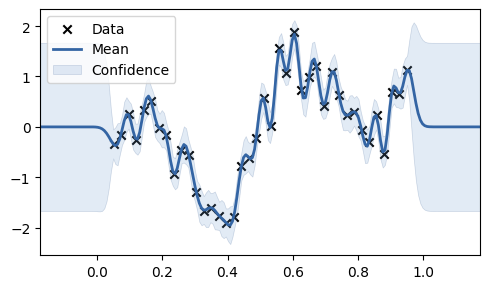

In [15]:
kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.Gaussian_noise.variance.fix(0.01)
model.optimize()
model.plot(figsize=(5, 3))

## Approximate multi-dimensional function

In [16]:
def rosenbrock(x):
    x = 0.5 * (4 * x - 2)
    y = np.sum((1 - x[:, :-1])**2 +
                100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)
    return y

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error

def plot_2d_func(func, n_rows=1, n_cols=1, title=None):
    grid_size = 100
    x_grid = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
    x_grid = np.hstack((x_grid[0].reshape(-1, 1), x_grid[1].reshape(-1, 1)))
    y = func(x_grid)
    fig = plt.figure(figsize=(n_cols * 6, n_rows * 6))
    ax = fig.add_subplot(n_rows, n_cols, 1, projection='3d')
    ax.plot_surface(x_grid[:, 0].reshape(grid_size, grid_size), x_grid[:, 1].reshape(grid_size, grid_size),
                    y.reshape(grid_size, grid_size),
                    cmap=cm.jet, rstride=1, cstride=1)
    if title is not None:
        ax.set_title(title)
    return fig

#### Here how the function looks like in 2D

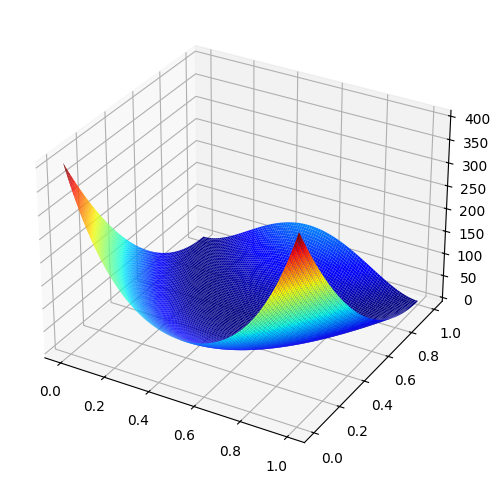

In [18]:
fig = plot_2d_func(rosenbrock)

### Training set
Note that it is 3-dimensional now

In [40]:
dim = 3
x_train = np.random.rand(300, dim)
y_train = rosenbrock(x_train).reshape(-1, 1)

x_train.shape, y_train.shape

((300, 3), (300, 1))

### Task

Try to approximate Rosenbrock function using RBF kernel. MSE (mean squared error) should be $<10^{-2}$.
**Hint**: if results are not good maybe it is due to bad local minimum. You can do one of the following things:
1. Try to use multi-start by calling `model.optimize_restarts(n_restarts)` method of the model.
2. Constrain model parameters to some reasonable bounds. You can do it for example as follows:
`model.Gaussian_noise.variance.constrain_bounded(0, 1)`


In [57]:
######## Your code here ########
# kernel = GPy.kern.RBF(1)
# model = GPy.models.GPRegression(x_train, y_train, kernel)
# # model.optimize_restarts(num_restarts=1)
# model.Gaussian_noise.variance.fix(0.1)
# model.optimize()
# model.plot(figsize=(5, 3))
kernel = GPy.kern.RBF(input_dim=3)
model = GPy.models.GPRegression(x_train, y_train, kernel)
model.Gaussian_noise.variance.fix(0.01)
model.Gaussian_noise.variance.constrain_bounded(0, 1)
model.optimize()

reconstraining parameters GP_regression.Gaussian_noise.variance


In [58]:
x_test = np.random.rand(3000, dim)
y_test = rosenbrock(x_test)
y_pr = model.predict(x_test)[0]

mse = mean_squared_error(y_test.ravel(), y_pr.ravel())
print('\nMSE: {}'.format(mse))


MSE: 0.22948522092141105


### Covariance functions

Short info about covariance function can be printed using `print(k)`. 

In [59]:
k = GPy.kern.RBF(1)
print(k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


You can plot the covariance function using `plot()` method.

{'covariance': [[<matplotlib.lines.Line2D at 0x7f5ac4c52e50>]]}

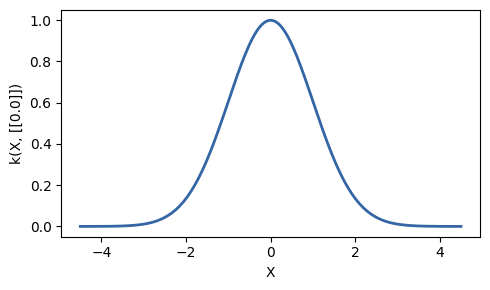

In [60]:
k.plot(figsize=(5, 3))

## More "complex" functions
The most popular covariance function is RBF. However, not all the functions can be modelled using RBF covariance function. For example, approximations of discontinuous functions will suffer from oscillations, approximation of curvy function may suffer from oversmoothing.

In [61]:
def heaviside(x):
    return np.asfarray(x > 0)


def rastrigin(x):
    """
    Parameters
    ==========
        x : ndarray - 2D array in [0, 1]
    
    Returns
    =======
        1D array of values of Rastrigin function
    """
    scale = 8  # 10.24
    x = scale * x - scale / 2
    y = 10 * x.shape[1] + (x**2).sum(axis=1) - 10 * np.cos(2 * np.pi * x).sum(axis=1)
    return y

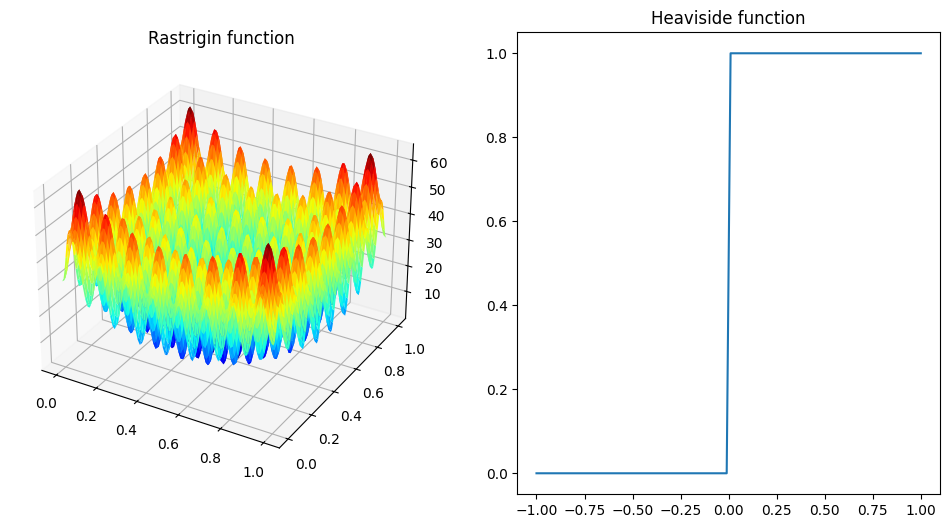

In [62]:
fig = plot_2d_func(rastrigin, 1, 2, title='Rastrigin function')

x = np.linspace(-1, 1, 100)
y = heaviside(x)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y)
ax.set_title('Heaviside function')
plt.show()

#### Example of oscillations
As you can see there are oscillations in viscinity of discontinuity because we are trying to approximate
discontinuous function using infinitily smooth function.

(-0.2, 1.2)

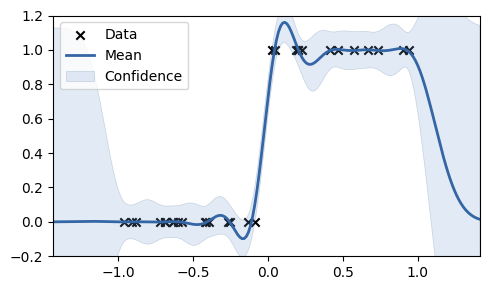

In [63]:
np.random.seed(42)
X = np.random.rand(30, 1) * 2 - 1
y = heaviside(X)

k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(X, y, k)
m.optimize()
m.plot(figsize=(5, 3))
plt.ylim([-0.2, 1.2])

#### Example of oversmoothing
Actually, the GP model only approximates trend of the function.
All the curves are treated as noise.
The knowledge about this (in fact there is some repeated structure) should be incorporated into the model via kernel function.

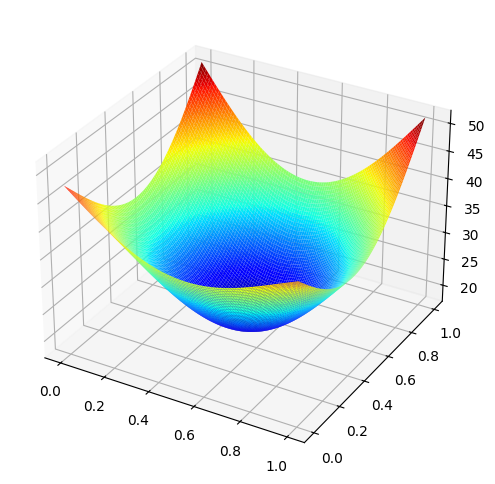

In [64]:
np.random.seed(42)

X = np.random.rand(300, 2)
y = rastrigin(X)

k = GPy.kern.RBF(input_dim=2)

m = GPy.models.GPRegression(X, y.reshape(-1, 1), k)
m.optimize()
fig = plot_2d_func(lambda x: m.predict(x)[0])